#### Summary
This project is about the predicting the cost of the restaurant cuisines. The cost of the cuisines depend on many factors like type of restaurant whether star restaurant or not, the locality, the type of day whether weekend or weekday, the time whether peek hours or not, the type of cuisine offered.

In this project we are Both datasets training and test datasets. We need to predict the best features in the datasets and build a model which will predict the nearest prices.

In [15]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
#import the dataset
df=pd.read_excel("Restaurant Train Data.xlsx")
dftest=pd.read_excel("restaurant test Data.xlsx")
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [17]:
#checking shape of the datasets
print(df.shape)
print(dftest.shape)

#There are 12690 rows and 9 columns in the training dataset
#There are 4231 rows and 8 columns in the test dataset

(12690, 9)
(4231, 8)


In [18]:
#checking the datatypes
print(df.dtypes)
print("\n")
print(dftest.dtypes)

#Restaurant ID and Cost are in int format. Rest all are in object format.

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object


TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object


#### Checking missing values

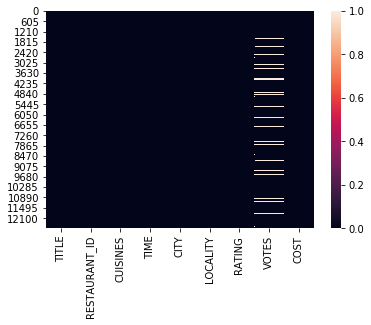

In [19]:
#training dataset
sns.heatmap(df.isnull())

In [20]:
#training dataset
df.isnull().sum()

# Training dataset - in city 112 values and in votes 1204 values are missing

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

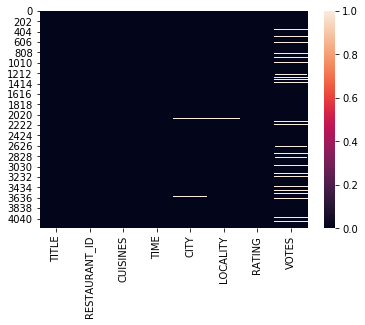

In [21]:
# test dataset

sns.heatmap(dftest.isnull())

In [22]:
# test dataset
dftest.isnull().sum()

#test dataset - city 35, locality 30, rating 2 and votes 402 values are missing

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [23]:
#checking the no. of unique values

#training dataset

col_name=[]
unique_value=[]

for i in df.columns:
    col_name.append(str(i))
    unique_value.append(df[i].nunique())

table=pd.DataFrame()
table['column_name']=col_name
table['Value']=unique_value

table=table.sort_values('Value', ascending=False)
table

,column_name,Value
1,RESTAURANT_ID,11892
2,CUISINES,4155
3,TIME,2689
7,VOTES,1847
5,LOCALITY,1416
4,CITY,359
0,TITLE,113
8,COST,86
6,RATING,32


In [24]:
#checking the unique values in the dataset
#training dataset
for i in df.columns:
    print(df[i].value_counts())
    print()

QUICK BITES                     4218
CASUAL DINING                   3652
None                            1003
CAFÉ                             607
DESSERT PARLOR                   382
                                ... 
CONFECTIONERY,QUICK BITES          1
SWEET SHOP,CONFECTIONERY           1
CASUAL DINING,FOOD COURT           1
CASUAL DINING,DESSERT PARLOR       1
MEAT SHOP                          1
Name: TITLE, Length: 113, dtype: int64

7264     8
4634     7
9910     6
13173    5
1571     5
        ..
461      1
2508     1
14794    1
10696    1
0        1
Name: RESTAURANT_ID, Length: 11892, dtype: int64

South Indian                                    532
North Indian                                    526
North Indian, Chinese                           501
Fast Food                                       286
Chinese                                         167
                                               ... 
North Indian, Iranian                             1
Kerala, Seafood, J

Observations for training dataset
1. The cuisines are of 4155 types.
2. The unique value of time is 2689.
3. The votes is 1847 unique types.
4. The locality is 1416 unique types.
5. The 359 unique cities are mentioned.
6. 1416 different localities are mentioned.
7. There are 11892 restaurant IDs
8. Title of cuisines is of 113 different types
9. Cost is 86 unique values.
10. Ratings is 32 different types.

In [25]:
#checking the no. of unique values

#test dataset

col_name=[]
unique_value=[]

for i in dftest.columns:
    col_name.append(str(i))
    unique_value.append(dftest[i].nunique())

tabletest=pd.DataFrame()
tabletest['column_name']=col_name
tabletest['Value']=unique_value

tabletest=tabletest.sort_values('Value', ascending=False)
tabletest

,column_name,Value
1,RESTAURANT_ID,4127
2,CUISINES,1727
3,TIME,1183
7,VOTES,1136
5,LOCALITY,834
4,CITY,151
0,TITLE,86
6,RATING,31


In [26]:
#checking the unique values in the dataset
#test dataset
for i in dftest.columns:
    print(dftest[i].value_counts())
    print()

QUICK BITES                   1416
CASUAL DINING                 1258
None                           284
CAFÉ                           223
DESSERT PARLOR                 126
                              ... 
COCKTAIL BAR,CASUAL DINING       1
CASUAL DINING,IRANI CAFE         1
CAFÉ,FOOD COURT                  1
BAKERY,CASUAL DINING             1
QUICK BITES,CASUAL DINING        1
Name: TITLE, Length: 86, dtype: int64

12799    3
15454    3
4262     3
11169    3
1619     3
        ..
9598     1
11432    1
3451     1
5496     1
10241    1
Name: RESTAURANT_ID, Length: 4127, dtype: int64

North Indian, Chinese                               213
North Indian                                        190
South Indian                                        174
Fast Food                                            78
Chinese                                              59
                                                   ... 
North Indian, Chinese, Hyderabadi                     1
North Indian, 

Observations for training dataset
1. The cuisines are of 1727 types.
2. The unique value of time is 1183.
3. The votes is 1136 unique types.
4. The locality is 834 unique types.
5. The 151 unique cities are mentioned.
6. 834 different localities are mentioned.
7. There are 4127 restaurant IDs
8. Title of cuisines is of 86 different types
9. Ratings is 31 different types.

In [27]:
#converting votes from object datatype to int
#firstly we need to remove votes from the data ex:- 29 votes should be converted to 29
#converting into float as the data has null values and it doesnot allow to convert to int

#training dataset
df['VOTES']=df['VOTES'].str.replace('votes','').astype(float) 
dftest['VOTES']=dftest['VOTES'].str.replace('votes','').astype(float)

In [28]:
df['VOTES'].head()
# the column VOTES has been converted to float successfully.

0     49.0
1     30.0
2    221.0
3     24.0
4    165.0
Name: VOTES, dtype: float64

In [29]:
#replacing the missing values in VOTES by the mean values.
#training and test dataset
df['VOTES']=df['VOTES'].fillna(df['VOTES'].mean())
dftest['VOTES']=dftest['VOTES'].fillna(dftest['VOTES'].mean())

In [30]:
#checking if there any missing values
print(df['VOTES'].isnull().sum())
print(dftest['VOTES'].isnull().sum())

#All missing values have been replaced successfully

0
0


In [31]:
#checking the rows where there are missing values
df[df.isnull().any(axis=1)]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
129,None,9101,"North Indian, South Indian, Chinese, Continental","12noon – 3pm, 7pm – 2am (Mon-Sun)",NaN,NaN,3.6,728.000000,500
204,BAKERY,15062,Bakery,Not Available,Kochi,Marine Drive,NaN,415.668901,200
246,QUICK BITES,14502,Biryani,12noon – 11pm (Mon-Sun),NaN,Palarivattom Kochi,3.4,82.000000,300
411,None,6313,"North Indian, Chinese, Pizza, Burger, Fast Food",7pm – 4am (Mon-Sun),NaN,NaN,4.0,29.000000,600
421,CAFÉ,14127,"Cafe, Fast Food",Not Available,Hyderabad,Banjara Hills,NaN,415.668901,350
...,...,...,...,...,...,...,...,...,...
12280,None,3446,"North Indian, Chinese",5pm – 5am (Mon-Sun),NaN,NaN,3.7,281.000000,500
12314,CASUAL DINING,11724,"North Indian, Bengali","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",NaN,Opposite to corporation bank and LIC office ba...,4.3,775.000000,650
12447,QUICK BITES,7314,"North Indian, Chinese, Mughlai, Seafood",12:30pm – 12midnight (Mon-Sun),NaN,Hyderabad,3.1,44.000000,350
12567,None,15532,"Biryani, Chinese, Fast Food, North Indian","11am – 1am (Mon, Sun), 11am – 12:15AM (Tue-Sat)",NaN,NaN,3.7,656.000000,300


Observations
If we above the above dataset, we can see that few cities missing can be derived by the locality names mentioned along.
But for the rest we can either replace city and location by mode (but then city and location cannot mismatch as location should be in same city) or else we can categorise separately as missing.

In [32]:
#replacing CITY details using available Locality details
df.iloc[246,4]='Kochi'
df.iloc[817,4]='Navi Mumbai'
df.iloc[5149,4]='Navi Mumbai'
df.iloc[5297,4]='Kochi'
df.iloc[6397,4]='Mumbai'
df.iloc[6451,4]='Chennai'
df.iloc[8456,4]='Bangalore'
df.iloc[8735,4]='Chennai'
df.iloc[9121,4]='Bangalore'
df.iloc[9268,4]='Kochi'
df.iloc[10200,4]='Thane'
df.iloc[10704,4]='Chennai'
df.iloc[11491,4]='Chennai'
df.iloc[12181,5]='Kadubesanahalli'
df.iloc[12314,4]='Bangalore'
df.iloc[12447,4]='Hyderabad'

In [33]:
#filling the nan values in the location and city columns by 'missing'

#training and test data
df['CITY']=df['CITY'].fillna('missing')
dftest['CITY']=dftest['CITY'].fillna('missing')

In [34]:
#filling the missing values with mode in the Rating column

# training and test dataset
df['RATING']=df['RATING'].fillna(df['RATING'].mode()[0])
dftest['RATING']=dftest['RATING'].fillna(dftest['RATING'].mode()[0])

In [35]:
#training dataset
#there are few values in the RATING column which is represented by '-'
#checking the rows where there are missing values
df[df['RATING']=='-']
#where the null values in the votes have been filled by mean, the ratings are also missing and represented by '-'. We can fill them by mean/mode

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,-,415.668901,400
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,415.668901,300
156,QUICK BITES,6302,South Indian,6am – 8pm (Mon-Sun),Kochi,Vyttila,-,415.668901,400
178,CASUAL DINING,14064,"Indian, Chinese",12noon – 11:30pm (Mon-Sun),Kochi,Vennala,-,415.668901,400
235,QUICK BITES,14990,Kerala,8am – 7pm (Mon-Sun),Kochi,Near Marine Drive,-,415.668901,50
...,...,...,...,...,...,...,...,...,...
12584,QUICK BITES,11842,"Kerala, Biryani",8am – 10pm (Mon-Sun),Kochi,Panampilly Nagar,-,415.668901,300
12585,CASUAL DINING,5878,Kerala,6am – 4pm (Mon-Sun),Kochi,Elamkulam,-,415.668901,400
12591,BEVERAGE SHOP,1167,"Beverages, Juices, Desserts",9am – 10pm (Mon-Sun),Kochi,Edappally,-,415.668901,150
12641,CASUAL DINING,8312,Kerala,7:30am – 11:30pm (Mon-Sun),Kochi,Pallimukku,-,415.668901,300


In [36]:
#training dataset
#Similarly in the Rating column there are values represented by 'NEW'. Even the same can be replaced by mode values.
df[df['RATING']=='NEW']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,NEW,415.668901,200
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,415.668901,200
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,NEW,415.668901,800
117,QUICK BITES,8091,"North Indian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,NEW,415.668901,500
120,QUICK BITES,4993,"North Indian, South Indian","7:30am – 9:30pm (Mon-Sat),Closed (Sun)",Bangalore-560066,Whitefield,NEW,415.668901,150
...,...,...,...,...,...,...,...,...,...
12602,QUICK BITES,11176,"Rolls, North Indian, Biryani",12noon – 12midnight (Mon-Sun),Mumbai,Mahakali,NEW,415.668901,200
12613,CASUAL DINING,397,"Asian, Thai, Sushi, Healthy Food",12noon – 11pm (Mon-Sun),Gurgaon,DLF Phase 4,NEW,415.668901,950
12630,CASUAL DINING,9959,"Tex-Mex, Italian, Coffee",8am – 10:30pm (Mon-Sun),Gurgaon,Golf Course Road,NEW,415.668901,1200
12658,None,9384,"Kerala, South Indian",11am – 5pm (Mon-Sun),Kochi,Chittoor Road,NEW,415.668901,400


In [37]:
#test dataset
#there are few values in the RATING column which is represented by '-'
#checking the rows where there are missing values
dftest[dftest['RATING']=='-']
#silimar to what we saw in training dataset, where the null values in the votes have been filled by mean, 
#the ratings are also missing and represented by '-'. We can fill them by mean/mode

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
37,QUICK BITES,5854,"Kerala, Fast Food",5am – 9pm (Mon-Sun),Kochi,Edappally,-,429.769391
66,QUICK BITES,414,South Indian,10am – 10pm (Mon-Sun),Kochi,Pallimukku,-,429.769391
73,QUICK BITES,3331,"Kerala, South Indian",Not Available,Kochi,Thevera,-,429.769391
108,BAKERY,1323,Bakery,9:30am – 10:30pm (Mon-Sun),Kochi,Thopumpady,-,429.769391
130,BEVERAGE SHOP,6507,Beverages,9am – 8:30pm (Mon-Sun),Kochi,Marine Drive,-,429.769391
...,...,...,...,...,...,...,...,...
4026,QUICK BITES,1278,"Chinese, South Indian",10am – 9pm (Mon-Sun),Kochi,Kaloor,-,429.769391
4030,CASUAL DINING,5915,"Kerala, Biryani",7am – 11pm (Mon-Sun),Kochi,Kacheripady,-,429.769391
4109,CASUAL DINING,3829,"Italian, Desserts, Continental",10am – 12midnight (Mon-Sun),KK Road,Near Express Garden,-,429.769391
4172,QUICK BITES,5365,"North Indian, Chinese, Kerala",9am – 11pm (Mon-Sun),Kochi,Palarivattom,-,429.769391


In [38]:
#test dataset
#Similarly in the Rating column there are values represented by 'NEW'. Even the same can be replaced by mode values.
dftest[dftest['RATING']=='NEW']

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",Navi Mumbai,Kharghar,NEW,429.769391
21,CASUAL DINING,3852,"North Indian, South Indian",12noon – 11pm (Mon-Sun),Chennai,Anna Salai,NEW,429.769391
24,QUICK BITES,8102,"Biryani, Andhra, North Indian",11am – 11pm (Mon-Sun),Bangalore,Banaswadi,NEW,429.769391
27,CASUAL DINING,4696,"Continental, Italian","11am – 12midnight (Mon-Thu),11am – 1am (Fri-Sun)",Bangalore,BTM,NEW,429.769391
29,QUICK BITES,14208,"North Indian, Chinese",12noon – 1am (Mon-Sun),Mumbai,Bandra West,NEW,429.769391
...,...,...,...,...,...,...,...,...
4181,CASUAL DINING,681,"American, Italian",7pm – 1am (Mon-Sun),Mumbai,Fort,NEW,429.769391
4183,CAFÉ,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),Noida,Sector 63,NEW,429.769391
4185,QUICK BITES,6387,Fast Food,12:30pm – 10:30pm (Mon-Sun),New Delhi,Shalimar Bagh,NEW,429.769391
4198,QUICK BITES,13381,Continental,11am – 12midnight (Mon-Sun),Bangalore,Indiranagar,NEW,429.769391


In [39]:
#replacing '-' and 'NEW' with mode in the training and test dataset
df['RATING']=df['RATING'].replace('-',df['RATING'].mode()[0])
dftest['RATING']=dftest['RATING'].replace('-',dftest['RATING'].mode()[0])
df['RATING']=df['RATING'].replace('NEW',df['RATING'].mode()[0])
dftest['RATING']=dftest['RATING'].replace('NEW',dftest['RATING'].mode()[0])

In [40]:
#converting the datatype of RATING from object to float
df['RATING']=df['RATING'].astype(float)
dftest['RATING']=dftest['RATING'].astype(float)

In [41]:
#checking if the columns have been changed properly
print(df.dtypes)
print("")
print(dftest.dtypes)


TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
COST               int64
dtype: object

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES            float64
dtype: object


In [42]:
# We can remove Restaurant ID from training and test dataset
df1=df.drop('RESTAURANT_ID', axis=1)
dftest1=dftest.drop('RESTAURANT_ID', axis=1)

In [43]:
df1.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300


#### Analysing by grouping 

In [44]:
Titlegroup=df1.groupby('TITLE').mean()
Titlegroup.sort_values(by='COST',ascending=False)

,RATING,VOTES,COST
TITLE,,,
FINE DINING,4.119156,548.287886,2958.928571
"COCKTAIL BAR,CASUAL DINING",4.100000,421.889634,2833.333333
"FINE DINING,BAR",4.225000,695.718750,2825.000000
CLUB,3.905000,571.333445,2555.000000
"FINE DINING,LOUNGE",3.862500,582.750000,2550.000000
...,...,...,...
"QUICK BITES,FOOD TRUCK",3.700000,55.000000,150.000000
"BEVERAGE SHOP,FOOD COURT",3.900000,415.668901,150.000000
"KIOSK,QUICK BITES",3.500000,20.500000,150.000000


Analysis
1. Fine Dining and Coctail Bar, Casual Dining are the costliest dining.
2. Bakery, sweet shop, Pan shop, quick bites cost is cheapest amongst all.


#### Checking distribution of the data

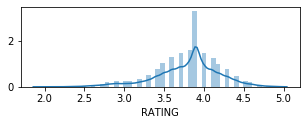

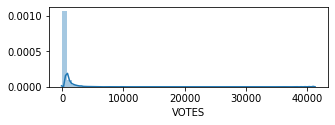

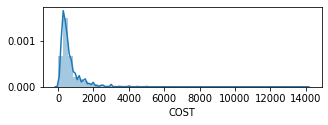

In [45]:
#training data
for i in df1.columns:
    if df1[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.distplot(df1[i])

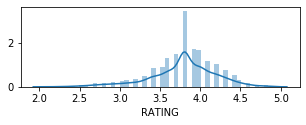

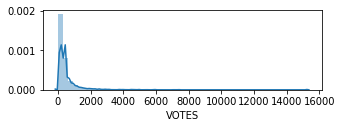

In [46]:
#test data
for i in dftest1.columns:
    if dftest1[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.distplot(dftest1[i])

Observations
Training data
1. The rating column is almost in a normal distribution
2. Most of the votes are within 1000.
3. Most of the Cost are within 1000.

Test data
1. The rating column is almost in a normal distribution
2. Most of the votes are within 1000.

#### checking outliers of the data

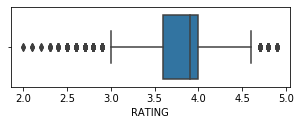

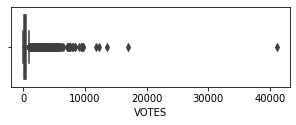

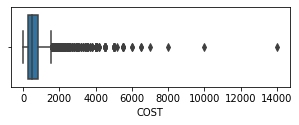

In [47]:
#training data
for i in df1.columns:
    if df1[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.boxplot(df1[i])

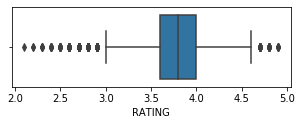

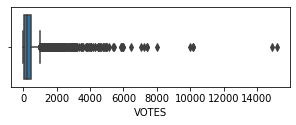

In [48]:
#test data
for i in dftest1.columns:
    if dftest1[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.boxplot(dftest1[i])

Observations
1. There are outliers in Rating, Votes in the test data.
2. There are outliers in Rating, Votes and Cost in the training data.

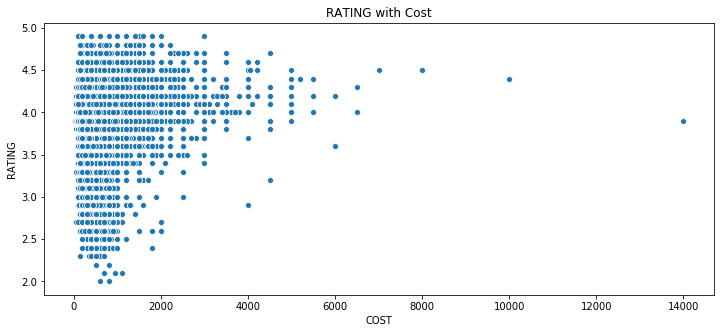

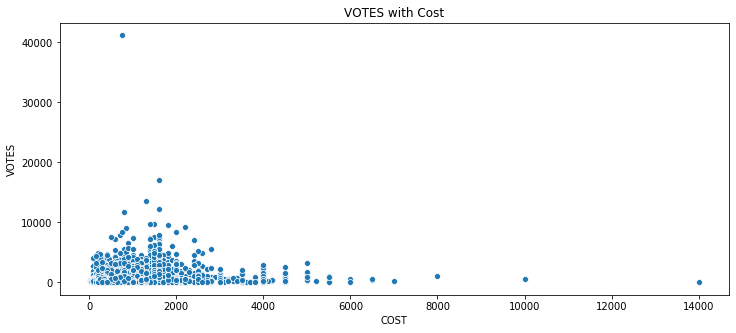

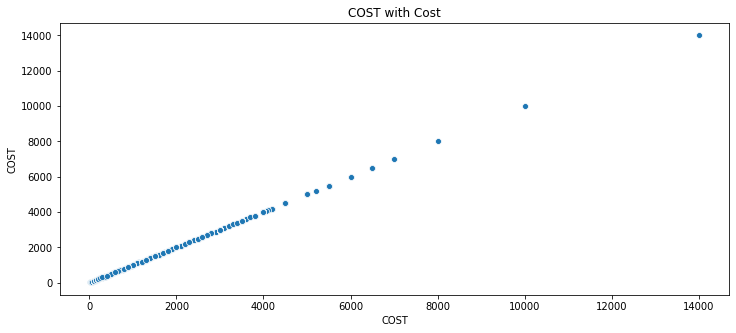

In [49]:
#scatter plots. checking the attributes relationship with the target 'Cost'. Since only training data has fees column, 
#we will use only training data here.

for i in df1.columns:
    if df1[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Cost')
        sns.scatterplot(x=df1['COST'], y=df1[i], data=df1)
        plt.show()

Observations
1. The numerical values have no positive correlation with the cost.

#### Checking Correlation

###### training data

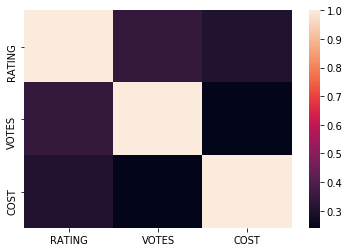

In [50]:
sns.heatmap(df1.corr())

In [51]:
df1.corr()

,RATING,VOTES,COST
RATING,1.000000,0.346739,0.308018
VOTES,0.346739,1.000000,0.240241
COST,0.308018,0.240241,1.000000


##### test data

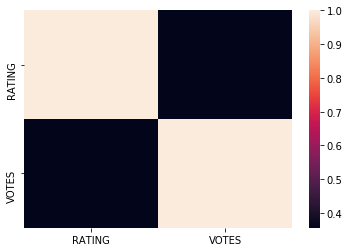

In [52]:
sns.heatmap(dftest1.corr())

In [53]:
dftest1.corr()

,RATING,VOTES
RATING,1.000000,0.356333
VOTES,0.356333,1.000000


Observations:
1. In both the training and test dataset, votes and ratings show little positive correlation.
2. Cost and rating has little positive correlation.

#### Label Encoding

In [54]:
#training data
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

for i in df1.columns:
    if df1.columns.dtype=='O':
        df1[i]=lb.fit_transform(df1[i].astype(str))

In [55]:
#test data
for i in dftest1.columns:
    if dftest1.columns.dtype=='O':
        dftest1[i]=lb.fit_transform(dftest1[i].astype(str))

In [56]:
df1.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,320,285,16,1279,7
1,33,289,1885,67,1047,22,950,18
2,31,2976,661,67,1102,18,712,81
3,95,4130,275,222,136,21,787,81
4,50,1766,615,222,621,18,470,43


In [57]:
dftest1.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,23,1293,503,110,662,22,824
1,75,1632,933,96,221,21,872
2,23,1455,219,96,411,17,575
3,66,208,1071,41,456,17,179
4,75,1637,208,78,300,15,394


#### removing outliers

In [58]:
#training dataset
from scipy.stats import zscore
z=np.abs(zscore(df1))
print("The datashape before removing outliers is ", df1.shape)
df2=df1[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", df2.shape)

The datashape before removing outliers is  (12690, 8)
The datashape after removing outliers is  (12623, 8)


In [59]:
#testing dataset
from scipy.stats import zscore
z=np.abs(zscore(dftest1))
print("The datashape before removing outliers is ", dftest1.shape)
dftest2=dftest1[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", dftest2.shape)

The datashape before removing outliers is  (4231, 7)
The datashape after removing outliers is  (4198, 7)


#### splitting the data into input and output variables
The training data will be split into input and output variables. Testing dataset has only input variables. Hence no need to spilt the same.

In [60]:
x=df1.iloc[:,0:-1]
y=pd.DataFrame(df.iloc[:,-1])
x.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31,2627,739,320,285,16,1279
1,33,289,1885,67,1047,22,950
2,31,2976,661,67,1102,18,712
3,95,4130,275,222,136,21,787
4,50,1766,615,222,621,18,470


In [61]:
y.head()

,COST
0,1200
1,1500
2,800
3,800
4,300


#### Checking the skewness in the datasets

In [62]:
x.skew()

TITLE      -0.069803
CUISINES   -0.218782
TIME        0.306186
CITY        0.292433
LOCALITY    0.332539
RATING     -0.610531
VOTES      -0.300137
dtype: float64

In [63]:
dftest2.skew()

TITLE      -0.020298
CUISINES   -0.208618
TIME        0.311112
CITY        0.108726
LOCALITY    0.300052
RATING     -0.446332
VOTES      -0.103036
dtype: float64

Observations
1. The datasets are normal and not skewed

#### Scaling the data

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6
0,-0.868887,0.325408,-0.584658,2.047933,-0.931285,-0.487207,0.603800
1,-0.807839,-1.616381,0.934369,-0.905332,0.955358,1.001812,-0.079534
2,-0.868887,0.615265,-0.688048,-0.905332,1.091533,0.009133,-0.573861
3,1.084647,1.573701,-1.199692,0.903980,-1.300196,0.753642,-0.418086
4,-0.288931,-0.389682,-0.749021,0.903980,-0.099380,0.009133,-1.076495


In [65]:
dftest2=pd.DataFrame(scaler.fit_transform(dftest2))
dftest2.head()

,0,1,2,3,4,5,6
0,-0.862147,0.733542,-0.061965,1.281713,1.152796,1.279600,0.794376
1,1.106692,1.413398,1.201252,0.925895,-0.700685,1.026680,0.949800
2,-0.862147,1.058429,-0.896276,0.925895,0.097867,0.015002,-0.011884
3,0.765931,-1.442399,1.606657,-0.471962,0.286998,0.015002,-1.294128
4,1.106692,1.423425,-0.928591,0.468414,-0.368655,-0.490838,-0.597960


In [66]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [67]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.17604721618359365 is achieved at random state 67


In [68]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=67,test_size=0.20)

In [69]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [70]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [71]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [72]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.17604721618359365
The cross val score is 0.14718305899596387
The mean squared error is 287233.79809057317
The root mean squared error is 535.9419726897429




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.4365969299317116
The cross val score is 0.4078544803489037
The mean squared error is 196404.94801418437
The root mean squared error is 443.17597860690097




DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_s

In [242]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.176047,0.146430,287233.798091,535.941973
1,KNeighborsRegressor,0.436597,0.401351,196404.948014,443.175979
2,DecisionTreeRegressor,0.109039,0.448940,310593.213948,557.308904
3,SVR,0.214159,0.182995,273947.688549,523.400123


In [243]:
#Let us try to boost our scores by trying boosters and lasso and ridge

#### Lasso

In [244]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(ls,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 1}

In [245]:
#Let us check the best r2 score for Lasso
ls=Lasso(alpha=1)
max_r2_score(ls,x,y)

The maximum r2 score 0.1758706984294911 is achieved at random state 67


In [246]:
#Let us check the cross val score for lasso
cross=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.14720020740359085


#### Ridge

In [247]:
#Let us check the best parameters for Ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(rd,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 1}

In [248]:
#Let us check the best r2 score for Ridge
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

The maximum r2 score 0.17604573503034582 is achieved at random state 67


In [249]:
#Let us check the cross val score for Ridge
cross=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.14718327167710085


#### Ensemble Techniques

#### Random Forest

In [250]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [251]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 100}

In [252]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=100)
max_r2_score(rf,x,y)

The maximum r2 score 0.7709000972314098 is achieved at random state 94


In [253]:
#Let us check the cross val score for RandomForest
cross=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.7116184917857187


#### GradientBoostingRegressor

In [254]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [255]:

#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)
max_r2_score(gb,x,y)

The maximum r2 score 0.7453486857635555 is achieved at random state 94


In [256]:
#Let us check the cross val score for GradientBoosting
cross=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.7004598181260269


In [257]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [258]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=200,learning_rate=0.01)
max_r2_score(ad,x,y)

The maximum r2 score 0.5687522179400886 is achieved at random state 43


In [261]:
#Let us check the cross val score for Adaboost
cross=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.5215265006591773


In [262]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.02, gamma=100, max_depth=25, min_child_weight=1, max_delta_step=0, subsample=0.75, colsample_bylevel=0.95, colsample_bytree=0.70, reg_lambda=1)
max_r2_score(xgb,x,y)

The maximum r2 score 0.6830812598176743 is achieved at random state 77


In [263]:
#Let us check the cross val score for XGBRegressor
cross=cross_val_score(xgb,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.631353350444092


In [298]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor','XGB Regressor'],'R2 Score':[0.176,0.176,0.771,0.745,0.569,0.683],'Cross_val_score':[0.147,0.147,0.711,0.700,0.521,0.631]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.176,0.147
1,Ridge,0.176,0.147
2,RandomForestRegressor,0.771,0.711
3,GradientBoostRegressor,0.745,0.700
4,AdaBoostRegressor,0.569,0.521
5,XGB Regressor,0.683,0.631


In [299]:
#Random Forest Regressor is giving the better scores. So we can finalise the same
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=94,test_size=0.20)
rf=RandomForestRegressor(n_estimators=100)
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
r2score=r2_score(test_y,pred)
cv=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.7701696166773451
The cross val score is 0.7073407014320564


In [302]:
#predicting the test data
predtest=rf.predict(dftest2)
pd.DataFrame(predtest).to_csv("Restaurant_food_predictions.csv")

In [303]:
import warnings
warnings.filterwarnings('ignore')

In [304]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rf,'Project14_Restaurant_Food_predictions.pkl')

['Project14_Restaurant_Food_predictions.pkl']